<a href="https://colab.research.google.com/github/m1328/image-classification/blob/main/Klasyfikacja__kwiat%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#POBIERANIE BAZY DANYCH
#instalacja pakietu gdown
!pip install -U --no-cache-dir gdown --pre
#usuwanie i tworzenie pustego katalogu data
!rm -rf flowers && mkdir flowers
#pobieranie zip-a ze zdjęciami
!gdown 1hXgGU7givaRp0HWRfwK1_aTVEqqKo-us -O flowerszip
#rozpakowywanie pliku data.zip do katalogu data
!unzip -q flowerszip -d flowers

Downloading...
From (uriginal): https://drive.google.com/uc?id=1hXgGU7givaRp0HWRfwK1_aTVEqqKo-us
From (redirected): https://drive.google.com/uc?id=1hXgGU7givaRp0HWRfwK1_aTVEqqKo-us&confirm=t&uuid=8671608f-0efe-426c-a8c7-5f5c091683fe
To: /content/flowerszip
100% 89.2M/89.2M [00:01<00:00, 81.3MB/s]


In [ ]:
#IMPORTOWANIE NIEZBEDNYCH BIBLIOTEK
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#WERYFIKOWANIE WIELKOSCI BAZY DANYCH
image_count = len(list(glob.glob('flowers/**/**/*.png')))
print(f'{image_count} examples of daisies and sunflowers')

1503 examples of daisies and sunflowers


In [ ]:
#WERYFIKOWANIE ROZKŁADU KLAS W BAZIE DANYCH
daisy_count = len(list(glob.glob('flowers/flowerszip/daisy/*.png')))
sunflower_count = len(list(glob.glob('flowers/flowerszip/sunflower/*.png')))
print(f'{daisy_count} examples of daisies and {sunflower_count} sunflowers.')


769 examples of daisies and 734 sunflowers.


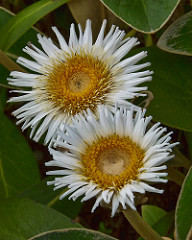

In [ ]:
#WYSWIETLANIE PRZYKLADOWYCH ZDJEC
flowers = list(glob.glob('flowers/flowerszip/daisy/*'))
PIL.Image.open(str(flowers[3]))

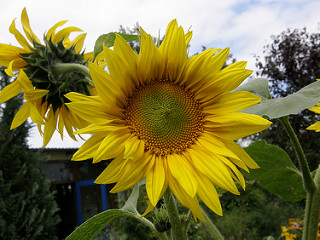

In [ ]:
#WYSWIETLANIE PRZYKLADOWYCH ZDJEC
flowers = list(glob.glob('flowers/flowerszip/sunflower/*'))
PIL.Image.open(str(flowers[3]))

In [ ]:
#ZMIENNE NIEZBEDNE DO TRENOWANIA MODELU
batch_size = 32
class_count = 2

img_height = 64
img_width = 64

In [ ]:
#LADOWANIE BAZY DANYCH WYKORZYSTANEJ DO TRENOWANIA MODELU
train_ds = tf.keras.utils.image_dataset_from_directory(
  'flowers/flowerszip',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1503 files belonging to 2 classes.


In [ ]:
#LADOWANIE BAZY DANYCH WYKORZYSTANEJ DO TESTOWANIA WYDAJNOSCI MODELU PODCZAS UCZENIA
val_ds = tf.keras.utils.image_dataset_from_directory(
  'flowers/flowerszip',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1503 files belonging to 2 classes.


In [ ]:
#WYSWIETLANIE NAZWY KLAS WYSTEPUJACYCH W BAZIE DANYCH
class_names = train_ds.class_names
print(f'class names: {class_names}')

class names: ['daisy', 'sunflower']


In [ ]:
#DROBNE USTAWIENIA OPTYMALIZACYJNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#TWORZENIE STRUKTURY MODELU SIECI NEURONOWEJ
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

In [ ]:
#KOMPILOWANIE MODELU ORAZ WYSWIETLANIE JEGO STRUKTURY
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [ ]:
#URUCHOMIENIE PROCESU TRENOWANIA
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
47/47 [==============================] - 14s 227ms/step - loss: 0.4559 - accuracy: 0.7731 - val_loss: 0.3001 - val_accuracy: 0.8789
Epoch 2/20
47/47 [==============================] - 17s 363ms/step - loss: 0.3078 - accuracy: 0.8749 - val_loss: 0.2757 - val_accuracy: 0.8882
Epoch 3/20
47/47 [==============================] - 13s 281ms/step - loss: 0.2577 - accuracy: 0.8949 - val_loss: 0.2469 - val_accuracy: 0.9022
Epoch 4/20
47/47 [==============================] - 9s 199ms/step - loss: 0.2263 - accuracy: 0.9088 - val_loss: 0.2371 - val_accuracy: 0.8989
Epoch 5/20
47/47 [==============================] - 12s 251ms/step - loss: 0.2291 - accuracy: 0.9069 - val_loss: 0.2428 - val_accuracy: 0.9029
Epoch 6/20
47/47 [==============================] - 10s 210ms/step - loss: 0.2023 - accuracy: 0.9268 - val_loss: 0.2174 - val_accuracy: 0.9155
Epoch 7/20
47/47 [==============================] - 10s 212ms/step - loss: 0.1846 - accuracy: 0.9295 - val_loss: 0.1358 - val_accuracy: 0.9508


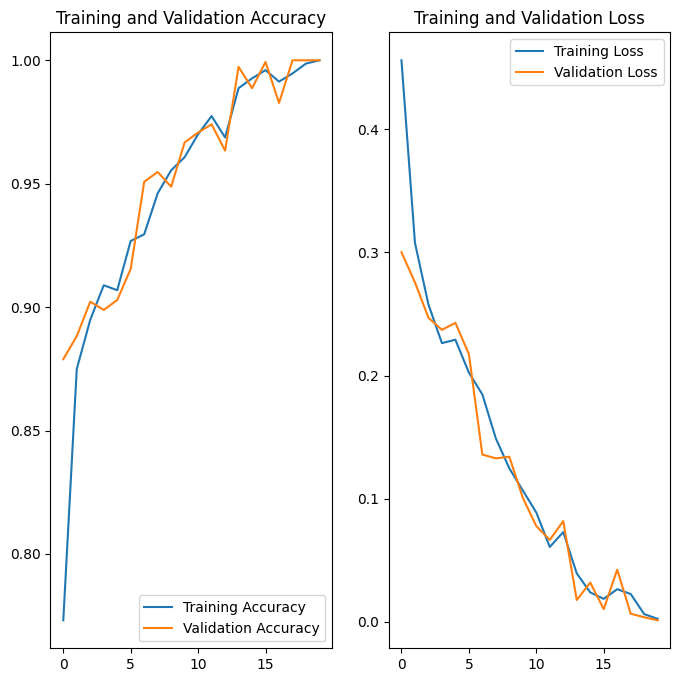

In [ ]:
#WYSWIETLENIE PRZEBIEGU PROCESU TRENOWANIA
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#RAPORT DOTYCZACY JAKOSCI KLASYFIKACJI
from sklearn.metrics import classification_report
def evaluate_model(val_ds, model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images, verbose=0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis=1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()
    print(classification_report(y_true, y_pred))

evaluate_model(val_ds, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       1.00      1.00      1.00       734

    accuracy                           1.00      1503
   macro avg       1.00      1.00      1.00      1503
weighted avg       1.00      1.00      1.00      1503

